## Compositional and Count Time Series

###  Example 16.1

图16.1显示了从1993年至2015年,“未超重” [体重指数（BMI）低于25]，“超重”（BMI在25至30之间）和“肥胖”（BMI在30以上）的英国成年人（161岁）的百分比）。1993年，成年人中47％的人没有超重，但在随后的20年中，这一比例稳步下降了大约10个百分点，而肥胖成年人的百分比增加了相同的数量，其中超重者的百分比保持大致恒定。

由于肥胖症在当前的健康辩论中起着主导作用，因此，对未来肥胖症水平的预测显然是帮助告知该领域公共政策的主要因素。这三个BMI类别以D =3和T =23构成类型（16.1）的时间序列组合。

In [ ]:
#导入第三方包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

读取数据

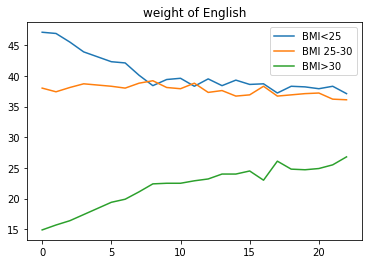

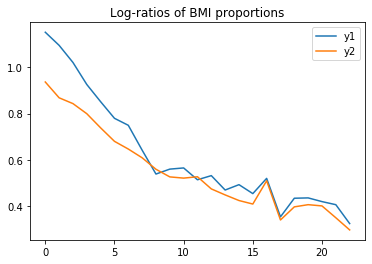

In [2]:
less=pd.read_csv("x1.csv").dropna(axis,how='any')
equal=pd.read_csv("x1.csv").dropna(axis,how='any')
more=pd.read_csv("x1.csv").dropna(axis,how='any')
plt.plot(less)
plt.plot(equal)
plt.plot(more)
plt.legend(['BMI<25',"BMI 25-30","BMI>30"])
plt.title('weight of English')
plt.show()
y1 = np.log(less/more)
y2 = np.log(equal/more)
plt.plot(y1)
plt.plot(y2)
plt.legend(["y1","y2"])
plt.title('Log-ratios of BMI proportions')
plt.show()
y1=pd.Series(y1).dropna()
y2=pd.Series(y2).dropna()

自定义最小二乘法估计：

In [18]:
def estimate_TD(sample,p):  
    matrix_x=np.zeros((len(sample)-p,p+4))  
    array=sample.reshape(len(sample))  #array是样本全体
    j=0
    for i in range(0,len(sample)-p):
        matrix_x[i,0:p+4]=np.hstack((np.array([1,p+i+1,(p+i+1)**2,(p+i+1)**3]),array[j:j+p]))
        j+=1  
    #在原有AR的OLS方法基础上加上beta0+beta1*t这一项
    matrix_y=np.array(array[p:len(sample)])
    matrix_y=matrix_y.reshape(len(sample)-p,1)
    #所有系数的表达式：A=(X^TX)^-1 X^T Y
    coef=np.dot(np.dot(np.linalg.inv(np.dot(matrix_x.T,matrix_x)),matrix_x.T),matrix_y)
    return coef
print(estimate_TD(np.array(y1),0))
print(estimate_TD(np.array(y2),0))

[[ 1.31429570e+00]
 [-1.25996607e-01]
 [ 6.51604400e-03]
 [-1.23262544e-04]]
[[ 1.02373348e+00]
 [-7.54244888e-02]
 [ 3.41758938e-03]
 [-6.28485921e-05]]


数据支持三次趋势指标，所有斜率系数都显着不同于零，拟合良好，并且没有迹象表明残差具有序列相关性。 然后计算了2016年至2020年的预测（h=1； ...； 5）。预计到2020年，英国“不超重”成年人的比例将进一步下降2.4个百分点，而“肥胖”成年人的比例预计将增加2.9个百分点，而“超重”成年人的比例仅为“超重” 预测这两个数字之差将下降0.5个百分点。

## Example 16.3

图1.12显示了1851年至2017年之间的北大西洋风暴和飓风的年度数量（后者是前者的子集）。每年的风暴数量从最少（1914年）一次到2015年的最多28次不等，而1907年或1914年则没有飓风。这两个序列显然是小次数时间序列的示例，因此可能适合IN-ARMA模型进行拟合。

待估计的参数a=0.710713, l1=2.773347, a1=0.315292, a2=0.178928, l2=4.848828


/opt/anaconda3/envs/test1py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/opt/anaconda3/envs/test1py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


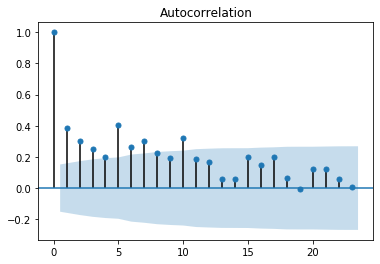

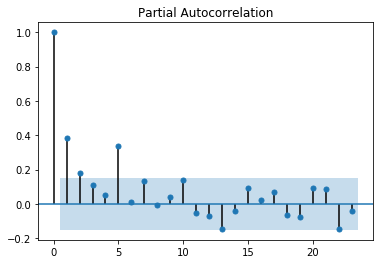

In [33]:
storms=pd.read_csv("storms.csv").dropna(axis=0,how='any')
r1 = 0.384
r2 = 0.300
phi2 = 0.179
score = np.sqrt(storms)*r1
y = storms -np.mean(storms)
s = np.sum(y)
plot_acf(storms).show()
plot_pacf(storms).show()
r1 = 0.384
r2 = 0.300
a = (np.mean(storms)*r1 + 1)/(np.mean(storms) - 3)
l1 = (1 - a)*np.mean(storms)
a1 = r1*(1 - r2)/(1 - r1**2)
a2 = (r2 - r1**2)/(1 - r1**2)
l2 =  (1 - a1 -a2)*np.mean(storms)
print('待估计的参数a=%f, l1=%f, a1=%f, a2=%f, l2=%f'%(a,l1,a1,a2,l2))

这些残差当然很少是整数值，但是如果检查了它们的SACF和PACF，它们可以提供对模型适当性的粗略检查。例如ACF的前四个分别是-0.08,.12,.11,-0.44，说明二阶的过程使得数据几乎没有留下依赖性。